In [19]:
import pandas as pd
import numpy as np

In [20]:
train_set = pd.read_csv("../data/train_set_cleaned.csv")
test_set = pd.read_csv("../data/test_set_cleaned.csv")

train_set.head()

,Unnamed: 0,cylinders,weight,acceleration,USA,Europe,Asia,mpg
0,0,0.325522,1.107825,1.957373,1.0,0.0,0.0,17.0
1,1,0.325522,-0.245703,-0.014558,1.0,0.0,0.0,18.0
2,2,-0.857474,-0.367557,0.702508,0.0,1.0,0.0,25.0
3,3,1.508519,0.226180,-1.269423,1.0,0.0,0.0,13.0
4,4,-0.857474,-1.182302,0.523242,0.0,0.0,1.0,32.0


In [21]:
test_set.columns

Index(['Unnamed: 0', 'cylinders', 'weight', 'acceleration', 'USA', 'Europe',
       'Asia', 'mpg'],
      dtype='object')

In [22]:
train_set.columns

Index(['Unnamed: 0', 'cylinders', 'weight', 'acceleration', 'USA', 'Europe',
       'Asia', 'mpg'],
      dtype='object')

In [23]:
X_train = train_set.drop(["mpg","Unnamed: 0", "model_year"], axis=1)
y_train = train_set["mpg"]

X_test = test_set.drop(["mpg","Unnamed: 0", "model_year"], axis=1)
y_test = test_set["mpg"]


KeyError: "['model_year'] not found in axis"

In [ ]:
X_train.head()

,cylinders,weight,acceleration,USA,Europe,Asia
0,1.509787,0.949776,-2.206922,1.0,0.0,0.0
1,-0.845797,-1.018100,0.814995,0.0,0.0,1.0
2,-0.845797,-1.167091,2.110102,0.0,1.0,0.0
3,-0.845797,-0.356579,-0.624013,0.0,0.0,1.0
4,0.331995,0.555247,0.563169,1.0,0.0,0.0


### Polynomial Regression

In [ ]:
X_train.columns

Index(['cylinders', 'weight', 'acceleration', 'USA', 'Europe', 'Asia'], dtype='object')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [ ]:
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_train_poly, y_train)

poly_pipeline = Pipeline(
    [
        ("poly", poly),
        ("model", lin_reg_poly)
        
    ]
)




In [ ]:
y_test_pred = lin_reg_poly.predict(X_test_poly)

In [ ]:
from sklearn.metrics import root_mean_squared_error

RMSE = root_mean_squared_error(y_true=y_test, y_pred=y_test_pred)
RMSE

3.4805758823772583

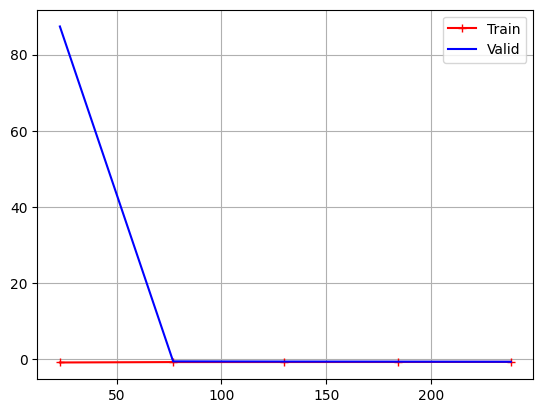

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, valid_scores = learning_curve(LinearRegression(), X_train_poly, y_train, cv=5)

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", label="Train")
plt.plot(train_sizes, valid_errors, "b-", label="Valid")
plt.legend()
plt.grid(visible=True)
plt.show()

### Simple Linear Regression

In [ ]:
lin_reg1 = LinearRegression()
lin_reg1.fit(X_train, y_train)
y_test_pred = lin_reg1.predict(X_test)

RMSE = root_mean_squared_error(y_true=y_test, y_pred=y_test_pred)
RMSE


3.6296912384719247

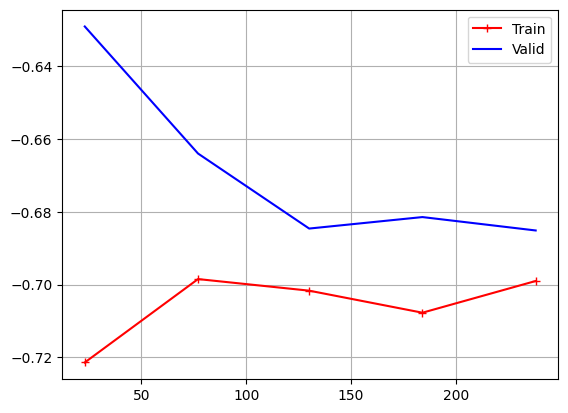

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, valid_scores = learning_curve(LinearRegression(), X_train, y_train, cv=5)

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", label="Train")
plt.plot(train_sizes, valid_errors, "b-", label="Valid")
plt.legend()
plt.grid(visible=True)
plt.show()

### RandomForestRegressor

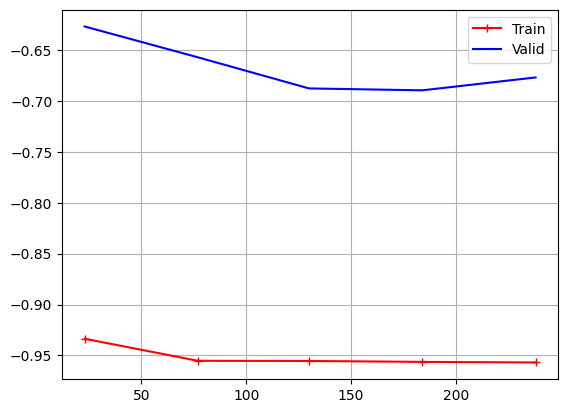

In [ ]:
from sklearn.ensemble import RandomForestRegressor

train_sizes, train_scores, valid_scores = learning_curve(RandomForestRegressor(random_state=42), X_train, y_train, cv=5)

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", label="Train")
plt.plot(train_sizes, valid_errors, "b-", label="Valid")
plt.legend()
plt.grid(visible=True)


In [ ]:
rf = RandomForestRegressor(n_estimators=100)

rf.fit(X_train_poly, y_train)
y_test_pred = rf.predict(X_test_poly)

RMSE = root_mean_squared_error(y_true=y_test, y_pred=y_test_pred)
RMSE


3.5924749365861994

### Serialize

In [ ]:
import joblib

joblib.dump(poly_pipeline, "../models/polynomial_regression.pkl")

['../models/polynomial_regression.pkl']

In [ ]:
df_test_full = X_test.join(y_test)
df_test_full.to_csv("../data/test_set_cleaned.csv")